In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('./Banknote_Authentication.csv')

In [17]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [19]:
df['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [21]:
import seaborn as sns

<Figure size 400x300 with 0 Axes>

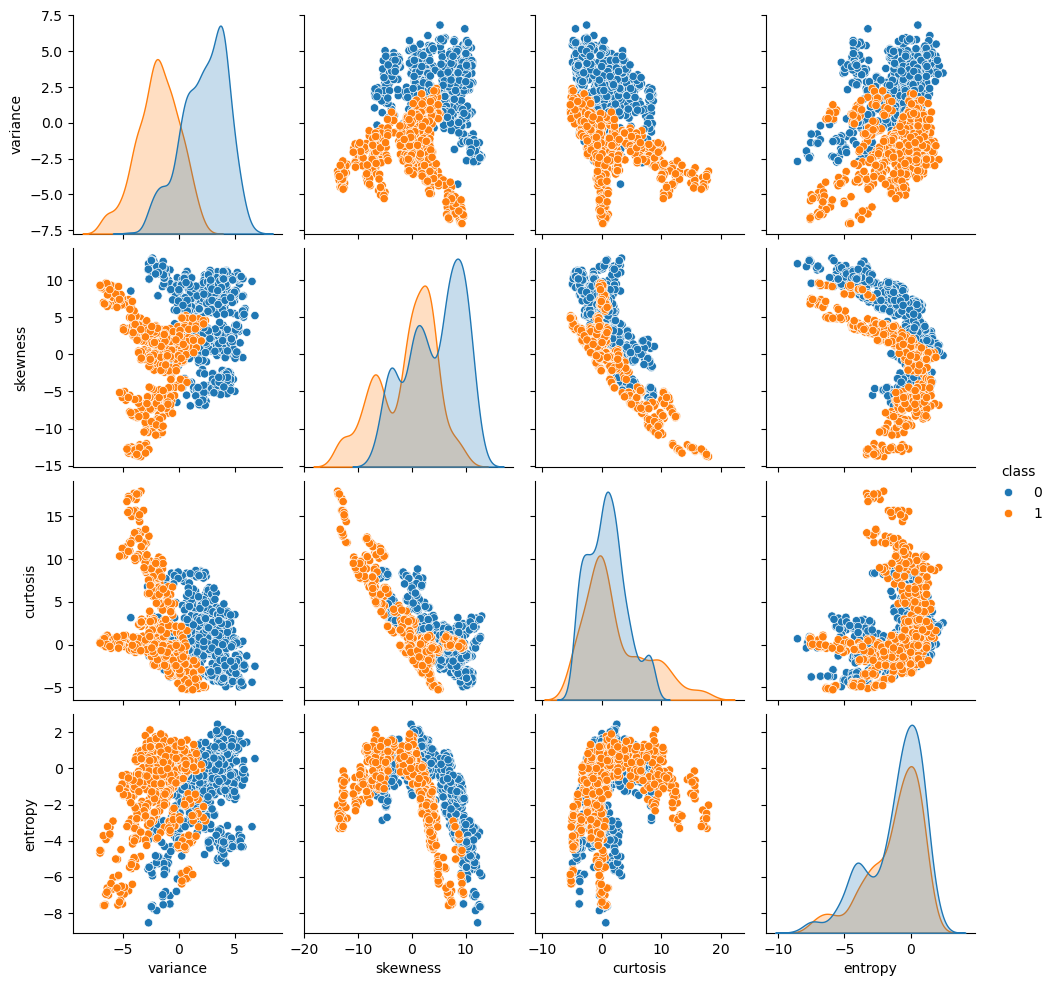

In [31]:
plt.figure(figsize=(4, 3))
sns.pairplot(df, hue="class")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [35]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [134]:
# %tensorflow_version 2.x  구글 코랩에서 사용되는 텐서플로 버전을 2.x로 하라는 명령어
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import SGD

In [142]:
K.clear_session()

model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)
result = model.evaluate(X_test, y_test)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.3483 - loss: 1.2248
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.4027 - loss: 1.0442
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.4597 - loss: 0.8970
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.4926 - loss: 0.7812
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.5967 - loss: 0.6919
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.6922 - loss: 0.6344
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8431 - loss: 0.5652
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.9341 - loss: 0.5219
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.9694 - loss: 0.4927
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9569 - loss: 0.4661
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.9383 - loss: 0.4537


In [59]:
historydf = pd.DataFrame(history.history, index=history.epoch)

In [61]:
historydf

,accuracy,loss
0,0.820833,0.477866
1,0.831250,0.458426
2,0.836458,0.441651
3,0.839583,0.427051
4,0.839583,0.414149
5,0.845833,0.402645
6,0.845833,0.392223
7,0.853125,0.382760
8,0.857292,0.374071
9,0.861458,0.366028


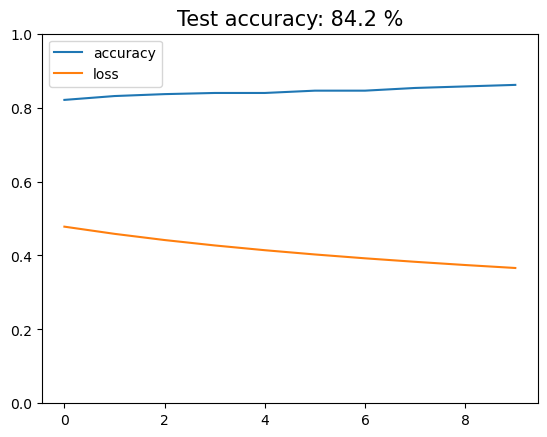

In [67]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)  # result[1] 은 accuracy를 의미 / 84.2는 테스트 셋에서의 정확도.
plt.show()

### Learning Rate

In [144]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Input(shape=(4,)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(learning_rate=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=1, epochs=10)

    dflist.append(pd.DataFrame(h.history, index=h.epoch))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.4230 - loss: 0.9802
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.5010 - loss: 0.7600
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.6452 - loss: 0.6191
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7699 - loss: 0.5255
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.8220 - loss: 0.4797
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8816 - loss: 0.4394
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.9166 - loss: 0.3902
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.9234 - loss: 0.3696
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.8998 - loss: 0.3726
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.9239 - loss: 0.3378
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.5937 - loss: 0.7094
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step -

In [84]:
print(dflist)

[   accuracy      loss
0  0.516667  0.929781
1  0.611458  0.695012
2  0.723958  0.546414
3  0.871875  0.459152
4  0.926042  0.406918
5  0.926042  0.373197
6  0.916667  0.349469
7  0.921875  0.331567
8  0.921875  0.317223
9  0.921875  0.305222,    accuracy      loss
0  0.793750  0.511687
1  0.920833  0.343840
2  0.933333  0.287376
3  0.939583  0.251667
4  0.948958  0.225580
5  0.955208  0.205430
6  0.960417  0.189153
7  0.961458  0.175848
8  0.963542  0.164711
9  0.964583  0.155269,    accuracy      loss
0  0.905208  0.414858
1  0.940625  0.260095
2  0.953125  0.209365
3  0.959375  0.178730
4  0.964583  0.157558
5  0.967708  0.142058
6  0.968750  0.130100
7  0.968750  0.120676
8  0.969792  0.112990
9  0.971875  0.106619,    accuracy      loss
0  0.881250  0.304159
1  0.964583  0.134743
2  0.970833  0.098232
3  0.973958  0.081626
4  0.978125  0.072853
5  0.980208  0.066092
6  0.980208  0.061576
7  0.981250  0.057908
8  0.981250  0.055258
9  0.981250  0.052915]


In [86]:
historydf = pd.concat(dflist, axis=1)
historydf

,accuracy,loss,accuracy,loss,accuracy,loss,accuracy,loss
0,0.516667,0.929781,0.793750,0.511687,0.905208,0.414858,0.881250,0.304159
1,0.611458,0.695012,0.920833,0.343840,0.940625,0.260095,0.964583,0.134743
2,0.723958,0.546414,0.933333,0.287376,0.953125,0.209365,0.970833,0.098232
3,0.871875,0.459152,0.939583,0.251667,0.959375,0.178730,0.973958,0.081626
4,0.926042,0.406918,0.948958,0.225580,0.964583,0.157558,0.978125,0.072853
5,0.926042,0.373197,0.955208,0.205430,0.967708,0.142058,0.980208,0.066092
6,0.916667,0.349469,0.960417,0.189153,0.968750,0.130100,0.980208,0.061576
7,0.921875,0.331567,0.961458,0.175848,0.968750,0.120676,0.981250,0.057908
8,0.921875,0.317223,0.963542,0.164711,0.969792,0.112990,0.981250,0.055258
9,0.921875,0.305222,0.964583,0.155269,0.971875,0.106619,0.981250,0.052915


In [90]:
metrics_reported = dflist[0].columns
print(metrics_reported)
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx
print(idx)

Index(['accuracy', 'loss'], dtype='object')
MultiIndex([(0.01, 'accuracy'),
            (0.01,     'loss'),
            (0.05, 'accuracy'),
            (0.05,     'loss'),
            ( 0.1, 'accuracy'),
            ( 0.1,     'loss'),
            ( 0.5, 'accuracy'),
            ( 0.5,     'loss')],
           names=['learning_rate', 'metric'])


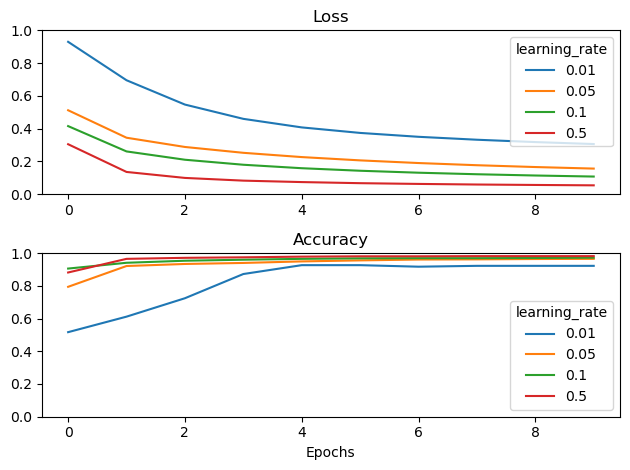

In [100]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()
plt.show()

### Batch Sizes

In [146]:
dflist = []

batch_sizes = [4, 8, 16, 32]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Input(shape=(4,)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0, epochs=10)

    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [148]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx
historydf

batch_size        4                   8                   16            \
metric      accuracy      loss  accuracy      loss  accuracy      loss   
0           0.807292  0.471968  0.194792  0.980165  0.546875  0.844788   
1           0.858333  0.388860  0.519792  0.696468  0.568750  0.724087   
2           0.884375  0.339409  0.706250  0.556895  0.617708  0.626000   
3           0.898958  0.303297  0.816667  0.475929  0.664583  0.549330   
4           0.912500  0.274963  0.860417  0.422033  0.710417  0.490602   
5           0.921875  0.251838  0.876042  0.382760  0.789583  0.446173   
6           0.927083  0.232598  0.886458  0.352209  0.853125  0.412176   
7           0.931250  0.216288  0.902083  0.327403  0.871875  0.385603   
8           0.936458  0.202362  0.918750  0.306666  0.883333  0.364310   
9           0.944792  0.190386  0.930208  0.288952  0.896875  0.346722   

batch_size        32            
metric      accuracy      loss  
0           0.575000  0.667784  
1           0.601042  0.624364  
2           0.631250  0.586390  
3           0.673958  0.553340  
4           0.707292  0.524530  
5           0.741667  0.499336  
6           0.779167  0.477323  
7           0.820833  0.457904  
8           0.842708  0.440705  
9           0.866667  0.425379

In [ ]:
1300/32

40.625

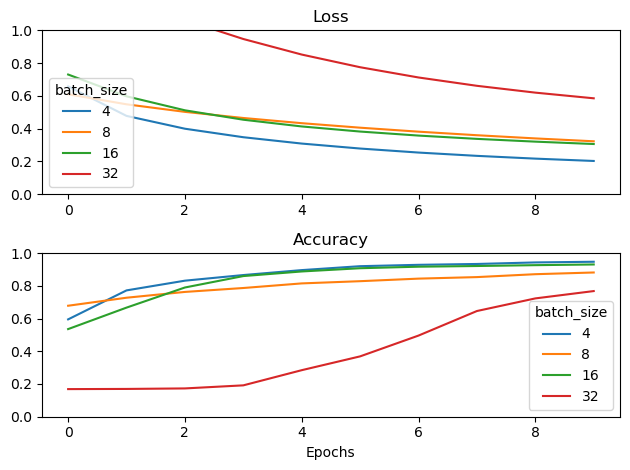

In [110]:
ax = plt.subplot(211)  # 2행 1열로 만드는 그래프 중 첫번째 그래프
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)  
# .xs metric 레벨에서 열값으로 'loss' 값만 사용한다는 뜻. ylim=(0,1) y축 범위를 0-1사이 제한
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)  
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()
plt.show()

### Optimizers

In [150]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

dflist = []

optimizers = ['SGD(learning_rate=0.01)',
              'SGD(learning_rate=0.01, momentum=0.3)',
              'SGD(learning_rate=0.01, momentum=0.3, nesterov=True)',
              'Adam(learning_rate=0.01)',
              'Adagrad(learning_rate=0.01)',
              'RMSprop(learning_rate=0.01)']

for opt_name in optimizers:

    K.clear_session()

    model = Sequential()
    model.add(Input(shape=(4,)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)

    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [118]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx
historydf

optimizers SGD(learning_rate=0.01)            \
metric                    accuracy      loss   
0                         0.669792  0.585603   
1                         0.816667  0.474591   
2                         0.902083  0.409160   
3                         0.929167  0.368378   
4                         0.922917  0.340939   

optimizers SGD(learning_rate=0.01, momentum=0.3)            \
metric                                  accuracy      loss   
0                                       0.473958  0.932191   
1                                       0.570833  0.725023   
2                                       0.664583  0.579162   
3                                       0.765625  0.480446   
4                                       0.861458  0.414754   

optimizers SGD(learning_rate=0.01, momentum=0.3, nesterov=True)            \
metric                                                 accuracy      loss   
0                                                    0.682292    0.594974   
1                                                    0.847917    0.440632   
2                                                    0.913542    0.364294   
3                                                    0.932292    0.322295   
4                                                    0.935417    0.295910   

optimizers Adam(learning_rate=0.01)           Adagrad(learning_rate=0.01)  \
metric                     accuracy      loss                    accuracy   
0                          0.819792  0.498913                    0.864583   
1                          0.920833  0.349298                    0.879167   
2                          0.940625  0.273051                    0.886458   
3                          0.956250  0.223653                    0.890625   
4                          0.963542  0.188603                    0.892708   

optimizers           RMSprop(learning_rate=0.01)            
metric          loss                    accuracy      loss  
0           0.418125                    0.640625  0.655639  
1           0.393105                    0.871875  0.432915  
2           0.378389                    0.906250  0.315602  
3           0.367459                    0.931250  0.239508  
4           0.358582                    0.936458  0.188286

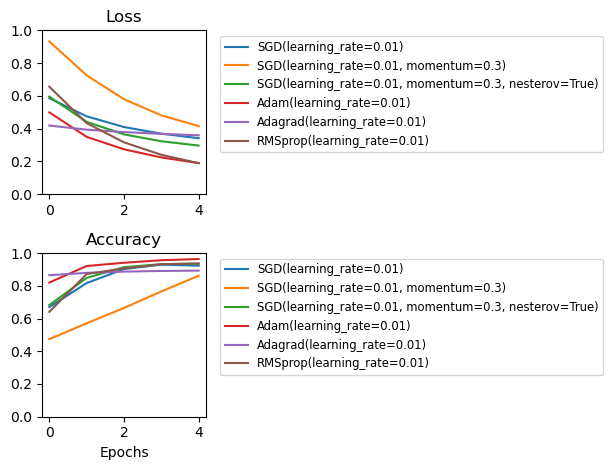

In [126]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small') 

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small') 

plt.tight_layout()
plt.show()

### Initializaters

In [152]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform', 'glorot_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Input(shape=(4,)))
    model.add(Dense(1, 
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)

    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [156]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx
historydf

initializers     zeros             uniform              normal            \
metric        accuracy      loss  accuracy      loss  accuracy      loss   
0             0.803125  0.670618  0.720833  0.663372  0.712500  0.642606   
1             0.808333  0.637139  0.775000  0.631384  0.741667  0.613238   
2             0.814583  0.607286  0.798958  0.602102  0.765625  0.586847   
3             0.826042  0.580655  0.811458  0.575788  0.781250  0.562760   
4             0.832292  0.556055  0.822917  0.552223  0.804167  0.540052   

initializers he_normal           lecun_uniform           glorot_uniform  \
metric        accuracy      loss      accuracy      loss       accuracy   
0             0.907292  0.421528      0.331250  0.899157       0.367708   
1             0.934375  0.391311      0.392708  0.856063       0.410417   
2             0.953125  0.365698      0.423958  0.817375       0.486458   
3             0.961458  0.344012      0.457292  0.780731       0.553125   
4             0.967708  0.324640      0.489583  0.746090       0.602083   

initializers            
metric            loss  
0             0.803569  
1             0.757870  
2             0.716117  
3             0.680203  
4             0.648029

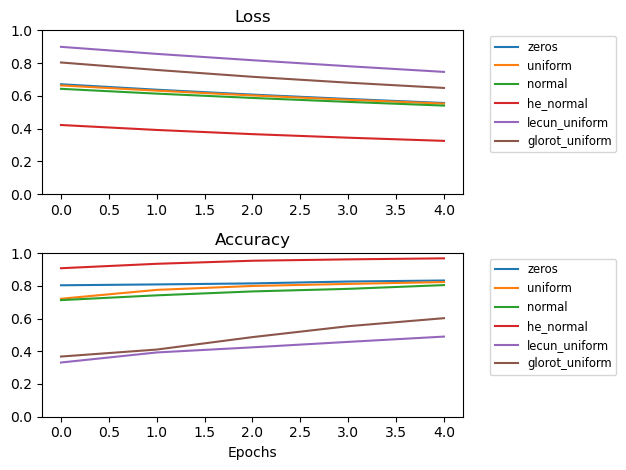

In [162]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

### Batch Normalization

In [166]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

#%tensorflow_version 2.x
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping

In [168]:
digits = load_digits()
X, y = digits.data, digits.target
y_cat = to_categorical(y, 10)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat,
                                                    test_size=0.3)

In [170]:
import random
random.seed(9001)
from tensorflow.keras.layers import BatchNormalization

In [178]:
def repeated_training(X_train,
                      y_train,
                      X_test,
                      y_test,
                      units=512,
                      activation='relu',
                      optimizer='adam',
                      do_bn=False,
                      epochs=10,
                      repeats=3):
    histories = []

    for repeat in range(repeats):
        K.clear_session()

        model = Sequential()
        model.add(Input(shape=(X_train.shape[1:])))
        
        # first fully connected layer
        model.add(Dense(units,
                        #input_shape=X_train.shape[1:],
                        kernel_initializer='normal',
                        activation=activation))
        if do_bn:
            model.add(BatchNormalization())

        # second fully connected layer
        model.add(Dense(units,
                        kernel_initializer='normal',
                        activation=activation))
        if do_bn:
            model.add(BatchNormalization())

        # third fully connected layer
        model.add(Dense(units,
                        kernel_initializer='normal',
                        activation=activation))
        if do_bn:
            model.add(BatchNormalization())

        # output layer
        model.add(Dense(10, activation='softmax'))

        model.compile(optimizer,
                      'categorical_crossentropy',
                      metrics=['accuracy'])

        h = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=epochs,
                      verbose=0)
        histories.append([h.history['accuracy'], h.history['val_accuracy']])
        print(repeat, end=' ')

    histories = np.array(histories)

    # calculate mean and standard deviation across repeats:
    mean_acc = histories.mean(axis=0)
    std_acc = histories.std(axis=0)
    print()

    return mean_acc[0], std_acc[0], mean_acc[1], std_acc[1]

In [180]:
mean_acc, std_acc, mean_acc_val, std_acc_val = \
    repeated_training(X_train, y_train, X_test, y_test, do_bn=False)

0 1 2 


In [182]:
mean_acc_bn, std_acc_bn, mean_acc_val_bn, std_acc_val_bn = \
    repeated_training(X_train, y_train, X_test, y_test, do_bn=True)

0 1 2 


In [184]:
def plot_mean_std(m, s):
    plt.plot(m)
    plt.fill_between(range(len(m)), m-s, m+s, alpha=0.1)

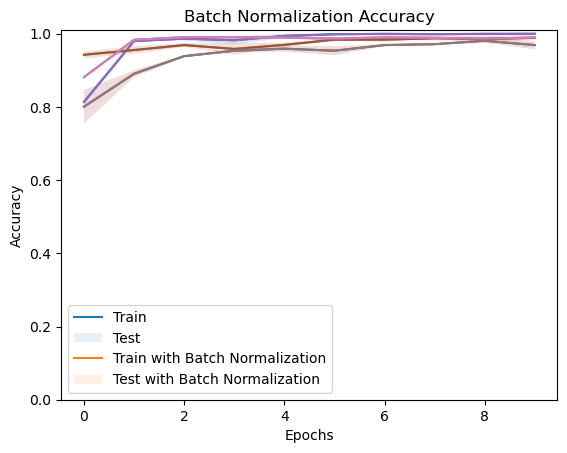

In [188]:
plot_mean_std(mean_acc, std_acc)
plot_mean_std(mean_acc_val, std_acc_val)
plot_mean_std(mean_acc_bn, std_acc_bn)
plot_mean_std(mean_acc_val_bn, std_acc_val_bn)
plt.ylim(0, 1.01)
plt.title("Batch Normalization Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')
plt.show()

We have trained 3 models with BN and 3 without. We can see that there is a significant difference between with and without BN. The orange and blue shades are the standard deviations. we can see the the performance is not within the margin of error

### Dropout

In [190]:
import numpy as np

#%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K

In [196]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [201]:
def repeated_training(X_train,
                      y_train,
                      X_test,
                      y_test,
                      units=512,
                      activation='relu',
                      optimizer='sgd',
                      do_do=False,
                      epochs=10,
                      repeats=3):
    histories = []

    for repeat in range(repeats):
        K.clear_session()

        model = Sequential()
        model.add(Input(shape=(28,28,1)))

        # first fully connected layer
        model.add(Conv2D(4, (3, 3), activation='relu'))
        model.add(Conv2D(4, (2, 2), activation='relu'))
        if do_do:
            model.add(Dropout(0.5))

        # second fully connected layer
        model.add(Flatten())

        model.add(Dense(64, activation='relu'))

        if do_do:
            model.add(Dropout(0.25))

        # third fully connected layer
        model.add(Dense(10, activation='softmax'))

        model.compile(optimizer,
                      'categorical_crossentropy',
                      metrics=['accuracy'])

        h = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=epochs,
                      verbose=0)
        histories.append([h.history['accuracy'], h.history['val_accuracy']])
        print(repeat, end=' ')

    histories = np.array(histories)

    # calculate mean and standard deviation across repeats:
    mean_acc = histories.mean(axis=0)
    std_acc = histories.std(axis=0)
    print()

    return mean_acc[0], std_acc[0], mean_acc[1], std_acc[1]

In [202]:
mean_acc, std_acc, mean_acc_val, std_acc_val = \
    repeated_training(X_train, y_train, X_test, y_test, do_do=False)

0 1 2 


In [203]:
mean_acc_bn, std_acc_bn, mean_acc_val_bn, std_acc_val_bn = \
    repeated_training(X_train, y_train, X_test, y_test, do_do=True)

0 1 2 


In [215]:
def plot_mean_std(m, s, label=None):
    plt.plot(m, label=label)
    plt.fill_between(range(len(m)), m-s, m+s, alpha=0.1)

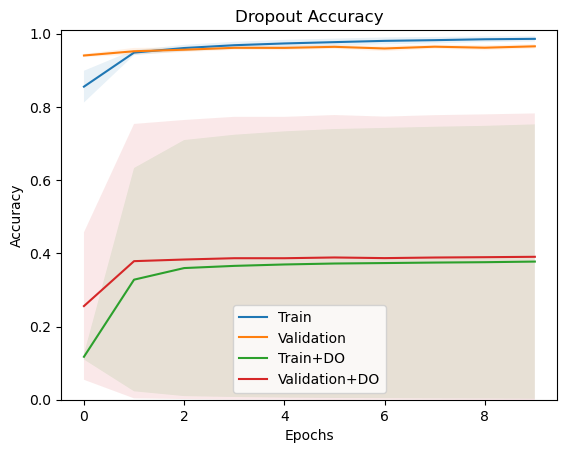

In [219]:
plot_mean_std(mean_acc, std_acc, label='Train')
plot_mean_std(mean_acc_val, std_acc_val, label='Validation')
plot_mean_std(mean_acc_bn, std_acc_bn, label='Train+DO')
plot_mean_std(mean_acc_val_bn, std_acc_val_bn, label='Validation+DO')
plt.ylim(0, 1.01)
plt.title("Dropout Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()